In [5]:
# IMPORT DATA
library(forecast)
library(ggplot2)
library(tseries)

# Data Cleaning
----

## Importing
----

In [6]:
# LOAD DATA
daily_data = read.csv('../data/day.csv', header=TRUE, stringsAsFactors=FALSE)
head(daily_data,10)

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.1687260,148,1362,1510
8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.2668040,68,891,959
9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.3619500,54,768,822
10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.2232670,41,1280,1321


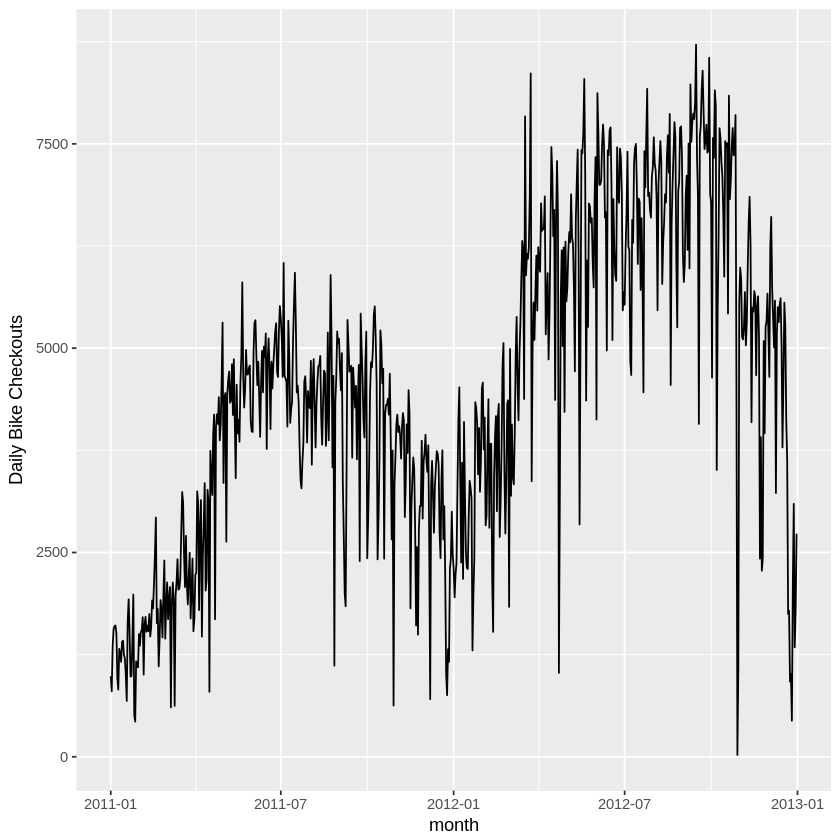

In [8]:
# PLOT DATA
daily_data$Date = as.Date(daily_data$dteday)
ggplot(daily_data, aes(Date, cnt)) + geom_line() + scale_x_date('month')  + ylab("Daily Bike Checkouts") +
            xlab("")

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.


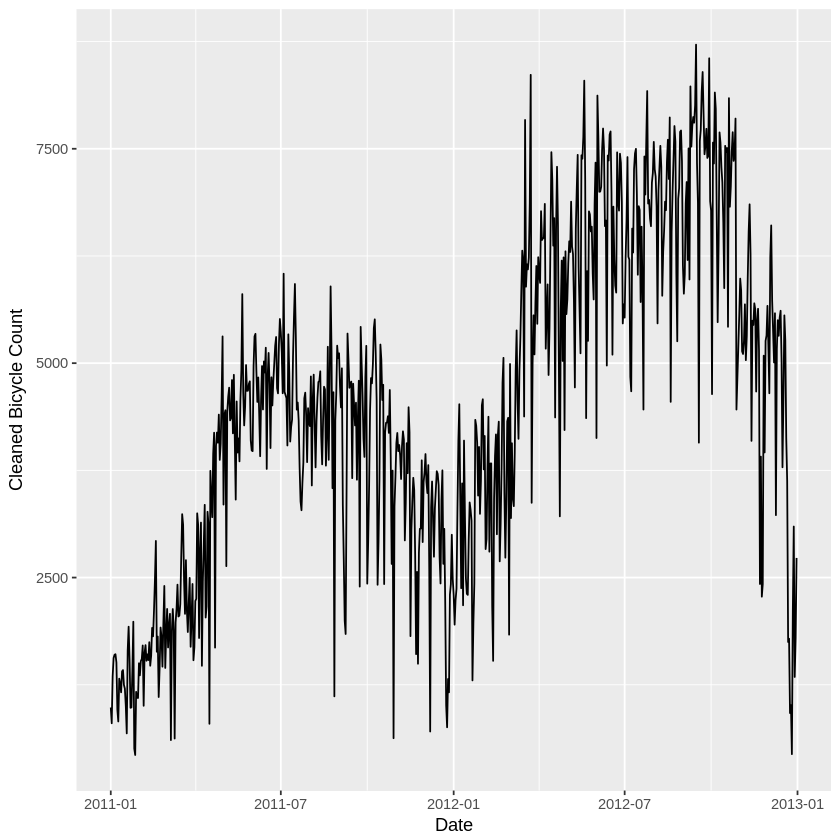

In [11]:
# CLEAN TS
count_ts = ts(daily_data[, c('cnt')])
daily_data$clean_cnt = tsclean(count_ts)
ggplot() +
  geom_line(data = daily_data, aes(x = Date, y = clean_cnt)) + ylab('Cleaned Bicycle Count')

## Moving Average Model
----

The first step will be to reduce the noise in the signal. It's important to be deliberate when applying noise reduction techniques. Removing outliers is one thing, removing underlying patterns is another. When deciding if/when/how to clean a signal, consider the following:
1. $\textbf{Performance Goals}$: This gets into a deeper discussion about model use. Generally, if the forecast will be used to discern general/mean trends, then noise reduction techniques such as moving averages make sense. If the forecast will be used for more sensitive risk assessments - such as will our base inventory meet demand - then this technique could fail. In either case, sensitivities and error bands could effectively correct for this. 
2. $\textbf{Role of historical data}$: Moving averages normalize the signal past on past and future trends. In certain cases, you may not want the model to be sensitive to future data - and introducing this data (even latently) can erode the future accuracy of your signal. 

In this case, a moving average is defined as:

$$ y_ma = \frac{1}{m} \sum_{-k}^{k} y_k,$$
where,
$$ m = 2k+1,$$

which is an odd number thereby generating a symmetric interval. Note, this should not be confused with a symmetric moving average, which would only average historical data points.

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Warning message:
“Removed 6 rows containing missing values (geom_path).”Warning message:
“Removed 30 rows containing missing values (geom_path).”

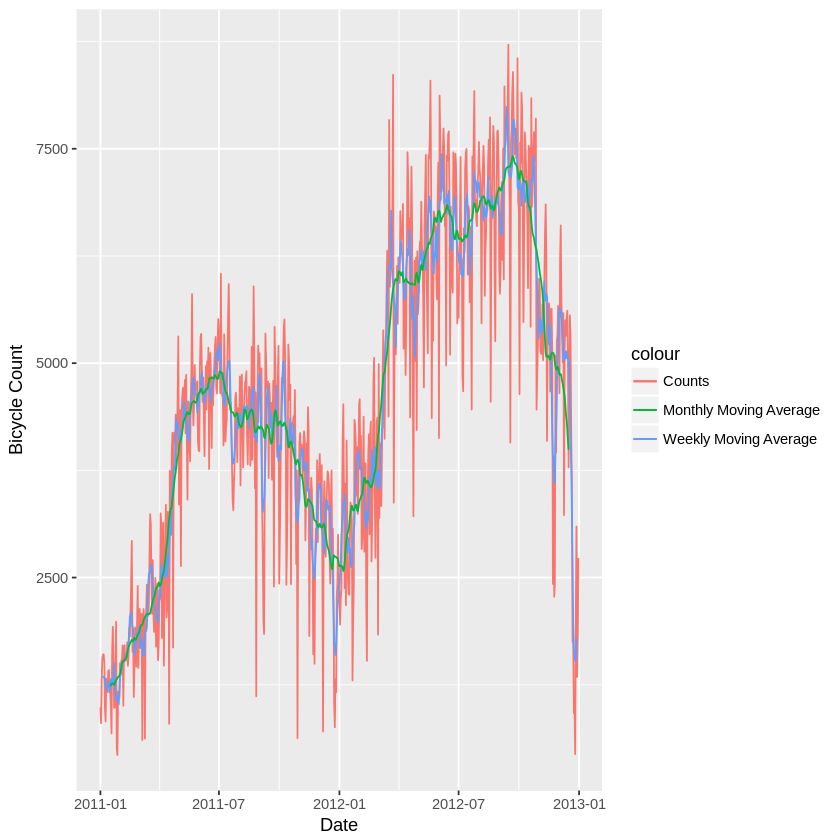

In [12]:
# MOVING AVERAGE
daily_data$cnt_ma = ma(daily_data$clean_cnt, order=7) # using the clean count with no outliers
daily_data$cnt_ma30 = ma(daily_data$clean_cnt, order=30)


ggplot() +
  geom_line(data = daily_data, aes(x = Date, y = clean_cnt, colour = "Counts")) +
  geom_line(data = daily_data, aes(x = Date, y = cnt_ma,   colour = "Weekly Moving Average"))  +
  geom_line(data = daily_data, aes(x = Date, y = cnt_ma30, colour = "Monthly Moving Average"))  +
  ylab('Bicycle Count')

In [14]:
head(daily_data, 10)

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Date,clean_cnt,cnt_ma,cnt_ma30
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985,2011-01-01,985,NA,NA
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801,2011-01-02,801,NA,NA
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349,2011-01-03,1349,NA,NA
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562,2011-01-04,1562,1344.714,NA
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600,2011-01-05,1600,1341.000,NA
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606,2011-01-06,1606,1344.000,NA
7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.1687260,148,1362,1510,2011-01-07,1510,1340.000,NA
8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.2668040,68,891,959,2011-01-08,959,1297.286,NA
9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.3619500,54,768,822,2011-01-09,822,1234.714,NA
10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.2232670,41,1280,1321,2011-01-10,1321,1206.143,NA


In this case, 3 different target variables are shown: 1.) the original signal, 2.) the original signal smoothed by a moving average model with k=3, and 3.) the original signal smoothed by a moving average model with k=30. It should be noted that as k increases the model becomes less sensitive to local variations - however, weighted percent error (WAPE) will likely increase. Again, aggressive moving average smoothing makes sense if the mean trend is the important signal. If local variations are important, then aggresive moving average smoothing would remove these trends.  

## Seasonal Decomposition and Stationarity
----

Seasonality in time-series data actually poses a challenge for state-space models like ARIMA. This is because they are $\it{non-stationary}$. For example, if the data trends up YoY, MoM, or WoW, then this has to be specified directly to ARIMA, effectively condensing or summarizing the data. ARIMA models are fully specified by 3 parameters, p, d, and q:

- p: The lag of between the time series elements, which is almost never set higher than 3.
- d: The degree of difference between time series elements (i.e. often the seasonality correction between peaks and/or troughs). 
- q: The moving average errors of the forecast.

All three terms are and combined via a linear equation. So, ARIMA(2,0,0) would take the form:
$$ y = \phi_0 + \phi_1 \cdot y_{t-1} + \phi_2 \cdot y_{t-2},$$
where $\phi$ is a parameter of the model. The linear form is an $\it{important}$ underlying characteristic of the model, and will be discussed in sections below.

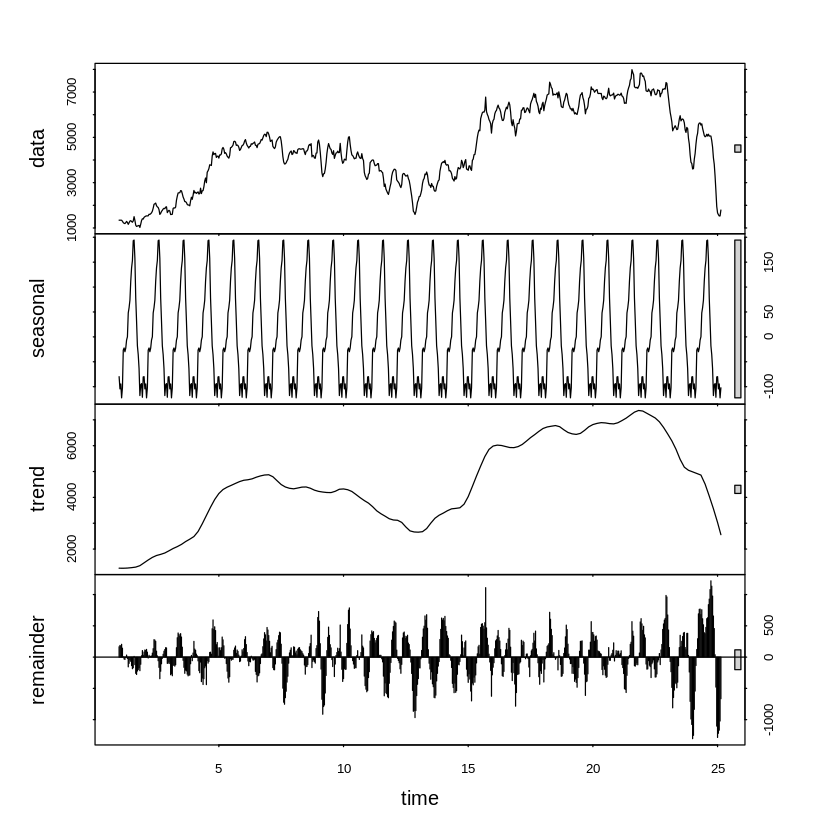

In [15]:
# SEASONAL DECOMPOSITION
count_ma = ts(na.omit(daily_data$cnt_ma), frequency=30)
decomp = stl(count_ma, s.window="periodic")
deseasonal_cnt <- seasadj(decomp)
plot(decomp)

# Statistical Tests
----

In [16]:
adf.test(count_ma, alternative = "stationary")

Warning message in adf.test(count_ma, alternative = "stationary"):
“p-value greater than printed p-value”


	Augmented Dickey-Fuller Test

data:  count_ma
Dickey-Fuller = -0.2557, Lag order = 8, p-value = 0.99
alternative hypothesis: stationary


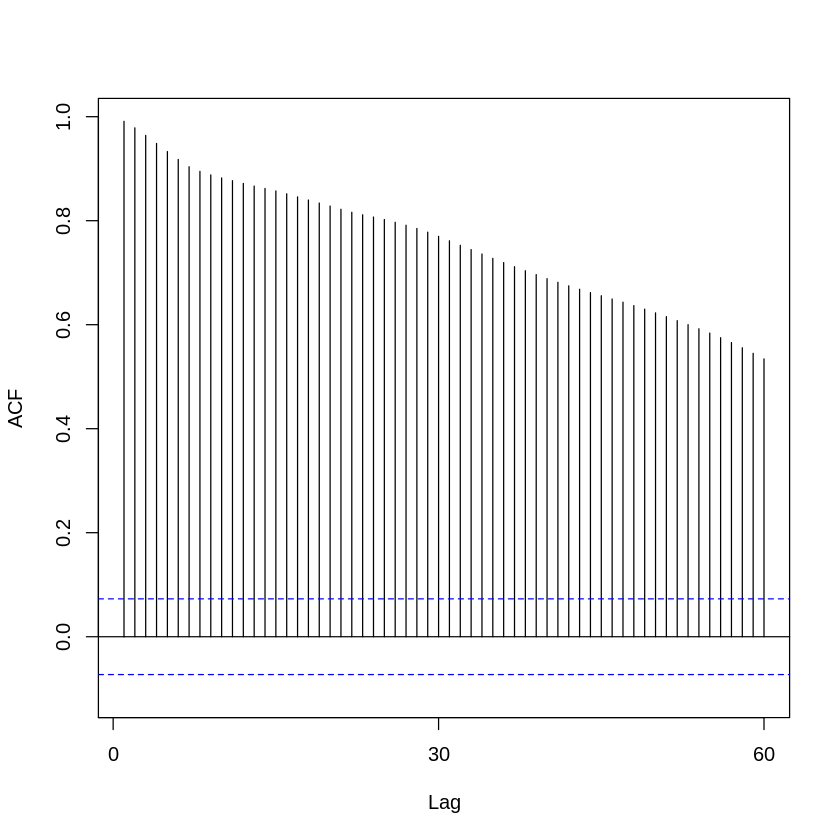

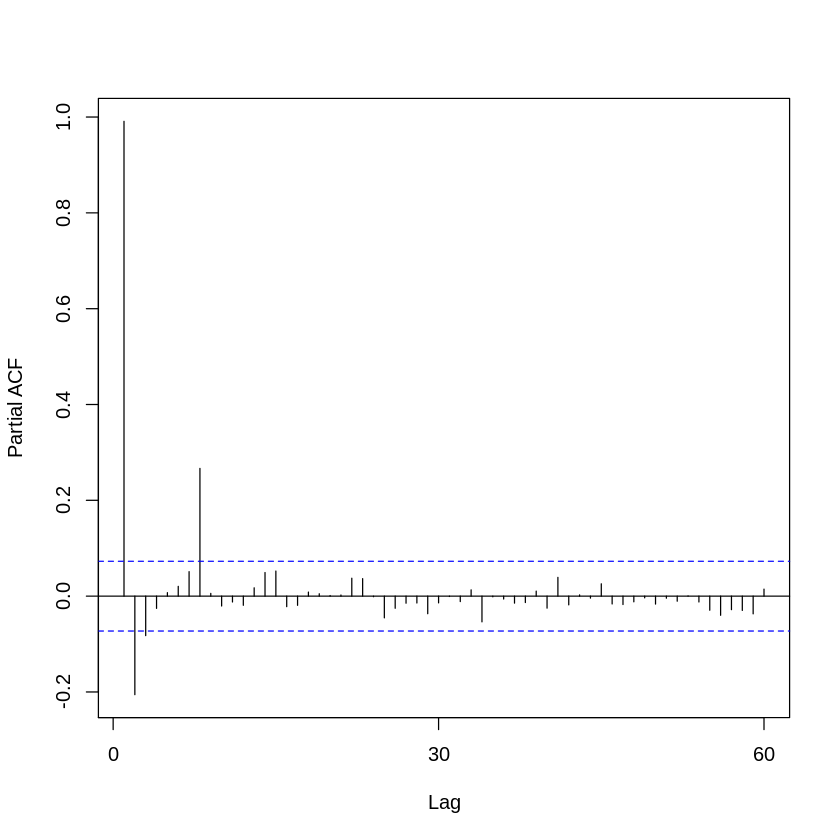

In [17]:
Acf(count_ma, main='')

Pacf(count_ma, main='')

Warning message in adf.test(count_d1, alternative = "stationary"):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  count_d1
Dickey-Fuller = -9.9255, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


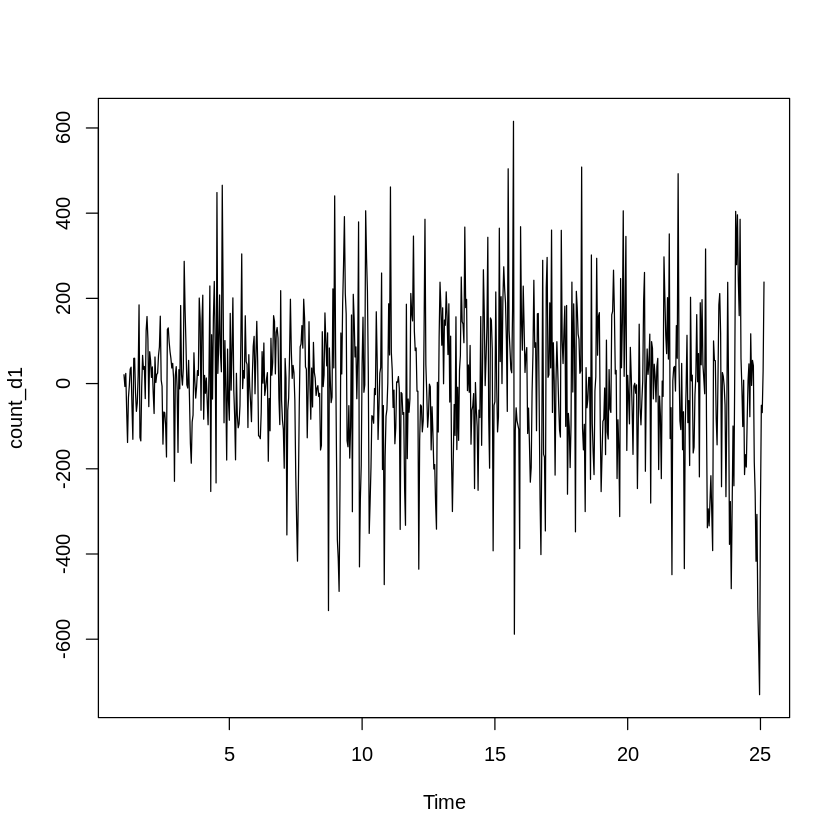

In [18]:
# ADF Tests
count_d1 = diff(deseasonal_cnt, differences = 1)
plot(count_d1)
adf.test(count_d1, alternative = "stationary")

# ARIMA Model
----

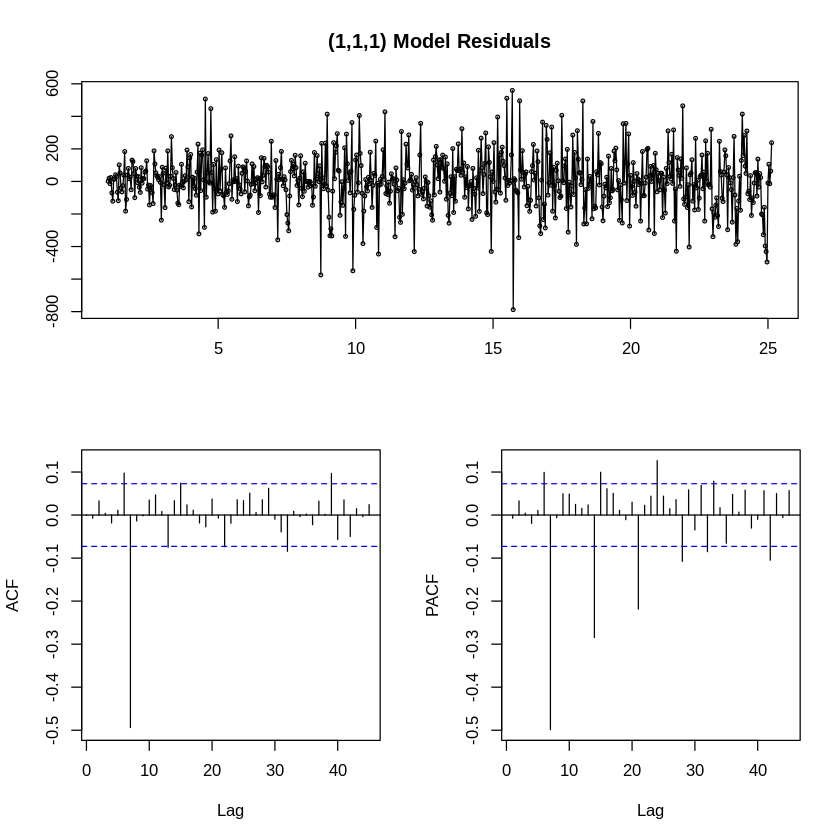

In [19]:
fit<-auto.arima(deseasonal_cnt, seasonal=FALSE)
tsdisplay(residuals(fit), lag.max=45, main='(1,1,1) Model Residuals')